In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
import os
print("Drive Mounted! Path: /content/drive/MyDrive")
print("Python Version:", sys.version)

Mounted at /content/drive
Drive Mounted! Path: /content/drive/MyDrive
Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
import os
import pandas as pd

def load_to_dataframe(data_folder, summary_folder):
    data = []

    for filename in os.listdir(data_folder):
        if filename.endswith('.txt'):
            doc_id = os.path.splitext(filename)[0]

            # Load document
            with open(os.path.join(data_folder, filename), 'r', encoding='utf-8') as f:
                document = f.read().strip()

            # Load corresponding summary
            summary_path = os.path.join(summary_folder, filename)
            if os.path.exists(summary_path):
                with open(summary_path, 'r', encoding='utf-8') as f:
                    summary = f.read().strip()
            else:
                summary = ""
                print(f"Warning: No summary found for {filename}")

            data.append({
                'doc_id': doc_id,
                'document': document,
                'summary': summary
            })

    return pd.DataFrame(data)

# Load data
df = load_to_dataframe('/content/drive/MyDrive/legal_summarization/complete_data', '/content/drive/MyDrive/legal_summarization/complete_summary')
print(f"Loaded {len(df)} document-summary pairs")
print(df.head())

Loaded 500 document-summary pairs
  doc_id                                           document  \
0     15  616, 643, 617, 644/74 and Civil Misc Writ Nos ...   
1      1  From the Judgment and Order dated 25. 11. 1987...   
2      0  Appeal by special leave from the order dated J...   
3     16  (Appeal by Special Leave from the Judgment and...   
4      6  Appeals by special leave from the judgement an...   

                                             summary  
0  The State of Uttar Pradesh has under the U. P....  
1  The appellant were registered partnership firm...  
2  The appellant appointed the 1st respondent as ...  
3  The respondent filed a Writ Petition in-the Hi...  
4  The appellants filed suit under the U. P Tenan...  


In [ ]:
display(df.head(10))

doc_id                                           document  \
0     15  616, 643, 617, 644/74 and Civil Misc Writ Nos ...   
1      1  From the Judgment and Order dated 25. 11. 1987...   
2      0  Appeal by special leave from the order dated J...   
3     16  (Appeal by Special Leave from the Judgment and...   
4      6  Appeals by special leave from the judgement an...   
5     18  Appeals by Special Leave from the Judgment and...   
6      2  Appeal from the judgment and decree dated June...   
7     13  Appeal by Special Leave from the Judgment and ...   
8     10  From the Judgment and Order dated 3. 6. 1983 o...   
9      3  165 of 1954.\nAppeal from the judgment and ord...   

                                             summary  
0  The State of Uttar Pradesh has under the U. P....  
1  The appellant were registered partnership firm...  
2  The appellant appointed the 1st respondent as ...  
3  The respondent filed a Writ Petition in-the Hi...  
4  The appellants filed suit under the U. P Tenan...  
5  To provide medical facilities to the workers i...  
6  The rule of estopple has gained new dimensions...  
7  Section 32(iv) of the Payment of Bonus Act pro...  
8  In the general election to the State Assembly ...  
9  The question for decision in this appeal by th...

In [ ]:
df["document"] = df["document"].str.replace("\n", " ")
df["summary"] = df["summary"].str.replace("\n", " ")

In [ ]:
df["judgment"] = df["document"]
df = df.drop("document", axis=1)

In [ ]:
df

doc_id                                            summary  \
0       15  The State of Uttar Pradesh has under the U. P....   
1        1  The appellant were registered partnership firm...   
2        0  The appellant appointed the 1st respondent as ...   
3       16  The respondent filed a Writ Petition in-the Hi...   
4        6  The appellants filed suit under the U. P Tenan...   
..     ...                                                ...   
495    103  In the present petitions filed before this cou...   
496    479  Petrol and allied products were supplied by th...   
497    283  The three appellants were convicted under sect...   
498    421  The Respondent--assessee used to manufacture t...   
499    469  The Madhya Pradesh Government issued a notific...   

                                              judgment  
0    616, 643, 617, 644/74 and Civil Misc Writ Nos ...  
1    From the Judgment and Order dated 25. 11. 1987...  
2    Appeal by special leave from the order dated J...  
3    (Appeal by Special Leave from the Judgment and...  
4    Appeals by special leave from the judgement an...  
..                                                 ...  
495  (Under Article 32 of the Constitution of India...  
496  Appeal from the judgment and order, dated July...  
497  Appeals from the judgment and order dated Janu...  
498  From the Judgment and Order dated 28. 11. 1988...  
499  Appeal from the judgment and order dated Octob...  

[500 rows x 3 columns]

In [ ]:
import pandas as pd

# Load Full Dataset
print("Dataset Info:")
print(df)  # Full size, splits

print(f"\nShape: {df.shape}")
print("Columns:", df.columns.tolist())  # ['ID', 'Judgment', 'Summary']


# df = df.drop(columns=['ID'], errors='ignore')  # Drop ID if not needed
print(df.head(2))  # First 2 samples

# Nulls & Duplicates
print(f"\nNulls - Judgment: {df['judgment'].isnull().sum()}, Summary: {df['summary'].isnull().sum()}")
df = df.dropna(subset=['judgment', 'summary'])  # Drop nulls
df = df.drop_duplicates(subset=['judgment'])  # Drop dups
print(f"Clean Shape: {df.shape}")

# Save Raw
df.to_csv(f'/content/raw_df.csv', index=False)
print("Raw DF Saved!")

Dataset Info:
    doc_id                                            summary  \
0       15  The State of Uttar Pradesh has under the U. P....   
1        1  The appellant were registered partnership firm...   
2        0  The appellant appointed the 1st respondent as ...   
3       16  The respondent filed a Writ Petition in-the Hi...   
4        6  The appellants filed suit under the U. P Tenan...   
..     ...                                                ...   
495    103  In the present petitions filed before this cou...   
496    479  Petrol and allied products were supplied by th...   
497    283  The three appellants were convicted under sect...   
498    421  The Respondent--assessee used to manufacture t...   
499    469  The Madhya Pradesh Government issued a notific...   

                                              judgment  
0    616, 643, 617, 644/74 and Civil Misc Writ Nos ...  
1    From the Judgment and Order dated 25. 11. 1987...  
2    Appeal by special leave from 

In [ ]:
# Installs (Run once – 5-10 min)
!pip install transformers datasets torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install sumy gensim sentence-transformers scikit-learn rouge-score bert-score
!pip install pandas numpy matplotlib seaborn nltk wordcloud

# NLTK Downloads
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

print("Installs Complete!")

Looking in indexes: https://download.pytorch.org/whl/cu118
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 115.7 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=2103e957bbb3093abacb6540c7b339bef0c79d33b56e50bcc1605b5bc098e452
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21695 sha256=bc60a447850f1599ae9ad2ff3aaeffe112a009bf5d3f1c590cdca4a2c520a486
  Stored in directory: /root/.cache/pip/wheels/32/99/64/59305409cacd03a

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...


Installs Complete!


[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize

# Word & Sentence Counts
df['judgment_words'] = df['judgment'].apply(lambda x: len(word_tokenize(str(x))))
df['judgment_sents'] = df['judgment'].apply(lambda x: len(sent_tokenize(str(x))))
df['summary_words'] = df['summary'].apply(lambda x: len(word_tokenize(str(x))))
df['summary_sents'] = df['summary'].apply(lambda x: len(sent_tokenize(str(x))))

# Stats
print("Length Stats:")
print(df[['judgment_words', 'judgment_sents', 'summary_words', 'summary_sents']].describe())
print(f"\nAvg Judgment Words: {df['judgment_words'].mean():.2f}")
print(f"Avg Judgment Sentences: {df['judgment_sents'].mean():.2f}")
print(f"\nAvg Summary Words: {df['summary_words'].mean():.2f}")
print(f"Avg Summary Sentences: {df['summary_sents'].mean():.2f}")

# Compression Ratio
df['compression_ratio'] = df['summary_words'] / df['judgment_words']
print(f"Avg Compression: {df['compression_ratio'].mean():.3f}")

Length Stats:
       judgment_words  judgment_sents  summary_words  summary_sents
count      500.000000      500.000000     500.000000       500.0000
mean      5348.742000      164.810000    2023.428000        65.0000
std       7972.940936      235.331638    2713.264362        88.3432
min        369.000000       16.000000      92.000000         2.0000
25%       2333.250000       76.000000     968.000000        32.0000
50%       3667.500000      115.000000    1419.000000        46.0000
75%       5462.500000      167.250000    2236.500000        74.2500
max     101352.000000     2807.000000   28762.000000      1026.0000

Avg Judgment Words: 5348.74
Avg Judgment Sentences: 164.81

Avg Summary Words: 2023.43
Avg Summary Sentences: 65.00
Avg Compression: 0.481


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/legal_summarization/data/raw_df_with_stats_cleaned.csv").head(5)
display(df1[["judgment","summary"]])

judgment  \
0  Appeal No. LXVI of 1949. Appeal from the High ...   
1  XXIX of 1950. Application under article 32 of ...   
2  XXXVII of 1950. Application under article 32 o...   
3  No. XVI of 1950. Appli cation under article 32...   
4  Civil Appeal No. 8 of 1951. Appeal from the ju...   

                                             summary  
0  The charge created in respect of municipal pro...  
1  Section 7 (1) (c) of the East Punjab Public Sa...  
2  Section 4 sub section (1) (c) of the East Punj...  
3  Held by the Full Court (i) (overruling a preli...  
4  S and B were sons of two brothers respectively...

In [ ]:
df[["judgment","summary"]].head()

judgment  \
0  616, 643, 617, 644/74 and Civil Misc Writ Nos ...   
1  From the Judgment and Order dated 25. 11. 1987...   
2  Appeal by special leave from the order dated J...   
3  (Appeal by Special Leave from the Judgment and...   
4  Appeals by special leave from the judgement an...   

                                             summary  
0  The State of Uttar Pradesh has under the U. P....  
1  The appellant were registered partnership firm...  
2  The appellant appointed the 1st respondent as ...  
3  The respondent filed a Writ Petition in-the Hi...  
4  The appellants filed suit under the U. P Tenan...

Top 20 Judgment Words: [('the', 242069), ('and', 53616), ('that', 40409), ('was', 25383), ('for', 22657), ('not', 18405), ('court', 14886), ('which', 13806), ('section', 13244), ('this', 13107), ('under', 12148), ('act', 11772), ('with', 11425), ('any', 9575), ('from', 9216), ('has', 8185), ('are', 7827), ('been', 7769), ('have', 7475), ('case', 7466)]


Top 20 Summary Words: [('the', 95268), ('and', 20646), ('that', 12012), ('was', 10566), ('not', 7882), ('for', 7814), ('court', 6776), ('section', 5914), ('under', 5636), ('act', 5514), ('which', 4330), ('with', 3634), ('from', 3104), ('were', 2972), ('had', 2928), ('state', 2888), ('this', 2636), ('any', 2582), ('high', 2520), ('appellant', 2354)]


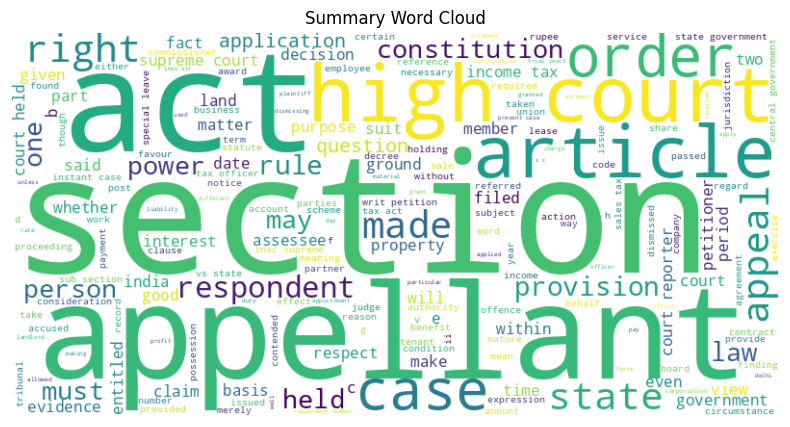

EDA Plots & Stats Saved!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

# Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['judgment_words'], bins=50, ax=axes[0,0]).set_title('Judgment Word Length Dist')
sns.histplot(df['summary_words'], bins=30, ax=axes[0,1]).set_title('Summary Word Length Dist')
sns.boxplot(data=df[['judgment_sents', 'summary_sents']], ax=axes[1,0]).set_title('Sentence Lengths')
df.plot.scatter(x='judgment_words', y='summary_words', ax=axes[1,1], alpha=0.5).set_title('Doc vs Summary Length')
plt.tight_layout()
plt.savefig(f'/content/eda_plots.png', dpi=300)
plt.show()

# Word Clouds & Top Words
all_judg_text = ' '.join(df['judgment'].astype(str)).lower()
judg_words = re.findall(r'\b[a-zA-Z]{3,}\b', all_judg_text)
judg_counter = Counter(judg_words)
print("Top 20 Judgment Words:", judg_counter.most_common(20))

wc_judg = WordCloud(width=800, height=400, background_color='white').generate(all_judg_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_judg, interpolation='bilinear')
plt.axis('off')
plt.title('Judgment Word Cloud')
plt.savefig(f'/content/judgment_wc.png', dpi=300)
plt.show()

all_summ_text = ' '.join(df['summary'].astype(str)).lower()
summ_words = re.findall(r'\b[a-zA-Z]{3,}\b', all_summ_text)
summ_counter = Counter(summ_words)
print("Top 20 Summary Words:", summ_counter.most_common(20))

wc_summ = WordCloud(width=800, height=400, background_color='white').generate(all_summ_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_summ, interpolation='bilinear')
plt.axis('off')
plt.title('Summary Word Cloud')
plt.savefig(f'/content/summary_wc.png', dpi=300)
plt.show()

# Save Updated DF
df.to_csv(f'/content/raw_df_with_stats.csv', index=False)
print("EDA Plots & Stats Saved!")

In [ ]:
pd.read_csv('/content/raw_df_with_stats.csv').head()

doc_id                                            summary  \
0      15  The State of Uttar Pradesh has under the U. P....   
1       1  The appellant were registered partnership firm...   
2       0  The appellant appointed the 1st respondent as ...   
3      16  The respondent filed a Writ Petition in-the Hi...   
4       6  The appellants filed suit under the U. P Tenan...   

                                            judgment  judgment_words  \
0  616, 643, 617, 644/74 and Civil Misc Writ Nos ...            4160   
1  From the Judgment and Order dated 25. 11. 1987...           10851   
2  Appeal by special leave from the order dated J...           15195   
3  (Appeal by Special Leave from the Judgment and...            3372   
4  Appeals by special leave from the judgement an...            4882   

   judgment_sents  summary_words  summary_sents  compression_ratio  
0             123           1654             57           0.397596  
1             344           3096            106           0.285319  
2             421           2560             78           0.168476  
3              85           1576             60           0.467378  
4             114           1070             32           0.219172

In [ ]:
import re
from collections import Counter
import nltk
nltk.download('words')  # English dict (~230k words)
from nltk.corpus import words

english_words = set(words.words())  # Known English words

# Your Legal Glossary (For Validation)
legal_terms = ['court', 'section', 'act', 'case', 'property', 'tax', 'charge', 'income', 'indian', 'high', 'state', 'appellant', 'respondent', 'judgment', 'liability', 'deduction', 'annual', 'capital', 'tribunal', 'commissioner', 'urban', 'municipal', 'immovable', 'bona fide', 'privy council']

all_known_words = english_words.union(legal_terms)  # Combined dict

def detect_true_broken(text):
    # Find splits
    splits = re.findall(r'\b(\w{2,32})\s+(\w{2,32})\b', text.lower())
    real_broken = []
    for part1, part2 in splits:
        combined = part1 + part2
        # True broken: Combined is known word, but parts are not (OCR split)
        if combined in all_known_words and part1 not in all_known_words and part2 not in all_known_words:
            real_broken.append((part1, part2, combined))
    return real_broken

# From All Summaries (Short, Fast)
print("True Broken from Summaries")
summ_text = ' '.join(df['summary'].str.lower())
true_broken_summ = detect_true_broken(summ_text)
summ_counter = Counter(true_broken_summ)

print("True Broken from Summaries:")
for pair, combined in summ_counter.most_common(len(summ_counter)):
    print(f"r'{pair[0]} {pair[1]}': '{pair[0] + pair[1]}',  # Combined: {combined}")

# From All Judgments (Longer, 1 min)
print("\nTrue Broken from Judgments")
judg_text = ' '.join(df['judgment'].str.lower())
true_broken_judg = detect_true_broken(judg_text)
judg_counter = Counter(true_broken_judg)

print("True Broken from Judgments:")
for pair, combined in judg_counter.most_common(len(summ_counter)):
    print(f"r'{pair[0]} {pair[1]}': '{pair[0] + pair[1]}',  # Combined: {combined}")

# # Save
summ_broken_df = pd.DataFrame(summ_counter.most_common(len(summ_counter)), columns=['broken_pair', 'count'])
judg_broken_df = pd.DataFrame(judg_counter.most_common(len(summ_counter)), columns=['broken_pair', 'count'])
summ_broken_df.to_csv(f'/content/true_broken_summ.csv', mode='a', header=False, index=False)
judg_broken_df.to_csv(f'/content/true_broken_judg.csv', mode='a', header=False, index=False)
print("\nTrue Broken CSVs Saved!")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True Broken from Summaries
True Broken from Summaries:
r'distin guished': 'distinguished',  # Combined: 12
r'consti tution': 'constitution',  # Combined: 10
r'considera tion': 'consideration',  # Combined: 8
r'estab lished': 'established',  # Combined: 8
r'constitu tion': 'constitution',  # Combined: 8
r'jurisdic tion': 'jurisdiction',  # Combined: 8
r'offi cer': 'officer',  # Combined: 6
r'compensa tion': 'compensation',  # Combined: 6
r'su preme': 'supreme',  # Combined: 6
r'restric tive': 'restrictive',  # Combined: 6
r'ques tion': 'question',  # Combined: 4
r'appro priate': 'appropriate',  # Combined: 4
r'judi cial': 'judicial',  # Combined: 4
r'authori ty': 'authority',  # Combined: 4
r'convic tion': 'conviction',  # Combined: 4
r'legisla tion': 'legislation',  # Combined: 4
r'acquisi tion': 'acquisition',  # Combined: 4
r'acqui sition': 'acquisition',  # Combined: 4
r'speci fically': 'specifically',  # Combined: 4
r'commu nity': 'community',  # Combined: 4
r'limita tion': 'limita

In [ ]:
summ_broken_df

broken_pair  count
0    (distin, guished, distinguished)     12
1      (consti, tution, constitution)     10
2    (considera, tion, consideration)      8
3        (estab, lished, established)      8
4      (constitu, tion, constitution)      8
..                                ...    ...
159        (artifi, cial, artificial)      2
160        (defini, tion, definition)      2
161        (imper, ative, imperative)      2
162    (inadmis, sible, inadmissible)      2
163  (compre, hensive, comprehensive)      2

[164 rows x 2 columns]

In [ ]:
import pandas as pd
import re
import ast
from tqdm import tqdm
import time


# === Step 1: Load the main dataset ===
print(f"Loaded dataset: {len(df)} rows")

# === Step 2: Load broken-word lists ===
# Read without header and provide column names
summ_broken = pd.read_csv(f'/content/true_broken_summ.csv', header=None, names=['broken_pair_str', 'count'])
judg_broken = pd.read_csv(f'/content/true_broken_judg.csv', header=None, names=['broken_pair_str', 'count'])


# === Step 3: Parse broken pairs correctly ===
def parse_broken_pair(pair_str):
    """
    Parse string representation of tuple: "('commis', 'sioner', 'commissioner')"
    Returns: pattern (e.g., 'commis sioner'), correction (e.g., 'commissioner')
    """
    try:
        # Use ast.literal_eval to safely parse the tuple string
        parts = ast.literal_eval(str(pair_str))
        if isinstance(parts, tuple) and len(parts) == 3:
            part1, part2, combined = parts
            pattern = f"{part1} {part2}"
            return pattern, combined
    except:
        pass
    return None, None

# === Step 4: Build correction dictionary ===
corrections = {}

for df_src in [summ_broken, judg_broken]:
    for _, row in df_src.iterrows():
        # Use the correct column name 'broken_pair_str'
        pattern, combined = parse_broken_pair(row['broken_pair_str'])
        if pattern and combined:
            corrections[pattern] = combined

print(f"✅ Loaded {len(corrections)} unique correction rules")
print(f"Sample corrections: {list(corrections.items())[:5]}")

# === Step 5: Clean tabs and extra whitespace ===
def clean_whitespace(text):
    """Remove tabs, extra spaces, and normalize whitespace"""
    if pd.isna(text) or text == '':
        return text

    text = str(text)
    # Replace tabs with single space
    text = text.replace('\t', ' ')
    text = text.replace('\'',' ')
    # Replace multiple spaces with single space
    text = re.sub(r' +', ' ', text)
    # Remove leading/trailing whitespace
    text = text.strip()

    return text

# === Step 6: Define correction function with case-insensitive replacement ===
def fix_broken_words(text):
    """
    Replace broken word patterns with their corrected versions.
    Handles case-insensitive matching while preserving original case when possible.
    """
    if pd.isna(text) or text == '':
        return text

    text = str(text)

    # First clean tabs and extra whitespace
    text = clean_whitespace(text)

    # Sort patterns by length (longest first) to handle overlapping patterns
    sorted_corrections = sorted(corrections.items(), key=lambda x: len(x[0]), reverse=True)

    for broken, correct in sorted_corrections:
        # Create case-insensitive pattern with word boundaries
        pattern = r'\b' + re.escape(broken) + r'\b'

        # Find all matches with their positions
        matches = list(re.finditer(pattern, text, flags=re.IGNORECASE))

        # Replace from end to start to preserve positions
        for match in reversed(matches):
            original = match.group()

            # Preserve original case pattern
            if original.isupper():
                replacement = correct.upper()
            elif original[0].isupper():
                replacement = correct.capitalize()
            else:
                replacement = correct.lower()

            text = text[:match.start()] + replacement + text[match.end():]

    return text

# === Step 7: Test on a sample first ===
print("\n=== Testing on sample text ===")
sample_text = "The commis sioner has\tissued a peti tion\tto the tribu nal regarding the ques tion."
print(f"Before: {repr(sample_text)}")
print(f"After:  {repr(fix_broken_words(sample_text))}")

# === Step 8: Estimate processing time ===
print("\n=== Estimating processing time ===")
# Test on 10 rows to estimate
test_sample = df['judgment'].head(10)
start_time = time.time()
for text in test_sample:
    fix_broken_words(text)
test_time = time.time() - start_time
avg_time_per_row = test_time / 10

total_rows = len(df)
estimated_time = (avg_time_per_row * total_rows * 2) / 60  # *2 for both columns
print(f"Estimated time: {estimated_time:.1f} minutes for {total_rows} rows ({len(corrections)} corrections)")

# === Step 9: Apply to entire dataset with progress bar ===
print("\n=== Applying corrections to entire dataset ===")

# Initialize tqdm for pandas
tqdm.pandas()

print("Processing judgments...")
df['judgment_cleaned'] = df['judgment'].progress_apply(fix_broken_words)

print("\nProcessing summaries...")
df['summary_cleaned'] = df['summary'].progress_apply(fix_broken_words)

# === Step 10: Count changes ===
judgment_changes = (df['judgment'] != df['judgment_cleaned']).sum()
summary_changes = (df['summary'] != df['summary_cleaned']).sum()

# Count tab removals
judgment_tabs = df['judgment'].astype(str).str.contains('\t').sum()
summary_tabs = df['summary'].astype(str).str.contains('\t').sum()

print(f"\n✅ Corrections applied:")
print(f"   - Judgments with tabs removed: {judgment_tabs}")
print(f"   - Summaries with tabs removed: {summary_tabs}")
print(f"   - Judgments modified: {judgment_changes}/{len(df)}")
print(f"   - Summaries modified: {summary_changes}/{len(df)}")

# === Step 11: Show examples of changes ===
print("\n=== Sample of corrections ===")
changed_indices = df[df['judgment'] != df['judgment_cleaned']].head(3).index

for idx in changed_indices:
    print(f"\nRow {idx} - Judgment snippet:")
    orig = df.loc[idx, 'judgment'][:300]
    cleaned = df.loc[idx, 'judgment_cleaned'][:300]
    print(f"Original: {repr(orig)}...")
    print(f"Cleaned:  {repr(cleaned)}...")
    print("-" * 80)

# === Step 12: Verify tab removal ===
tabs_remaining_j = df['judgment_cleaned'].astype(str).str.contains('\t').sum()
tabs_remaining_s = df['summary_cleaned'].astype(str).str.contains('\t').sum()
print(f"\n✅ Tab character verification:")
print(f"   - Tabs remaining in judgments: {tabs_remaining_j}")
print(f"   - Tabs remaining in summaries: {tabs_remaining_s}")

# === Step 13: Quality check - show some broken words that were fixed ===
print("\n=== Quality Check: Verifying fixes ===")
test_patterns = ['commis sioner', 'peti tion', 'tribu nal', 'ques tion']
for pattern in test_patterns:
    orig_count = df['judgment'].astype(str).str.contains(pattern, case=False, regex=False).sum()
    new_count = df['judgment_cleaned'].astype(str).str.contains(pattern, case=False, regex=False).sum()
    if orig_count > 0:
        print(f"'{pattern}': {orig_count} occurrences → {new_count} remaining")

# === Step 14: Save cleaned version ===
df['judgment'] = df['judgment_cleaned']
df['summary'] = df['summary_cleaned']
df = df.drop(['judgment_cleaned', 'summary_cleaned'], axis=1)

output_path = f'/content/raw_df_with_stats_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"\n✅ Cleaned dataset saved as: {output_path}")

# Optional: Save correction log
correction_log = pd.DataFrame(list(corrections.items()), columns=['broken_pattern', 'correction'])
correction_log = correction_log.sort_values('broken_pattern')
log_path = f'/content/correction_log.csv'
correction_log.to_csv(log_path, mode = "a", index=False)
print(f"✅ Correction log saved as: {log_path}")

print("\n" + "="*80)
print("CLEANING COMPLETE!")
print("="*80)

Loaded dataset: 500 rows
✅ Loaded 270 unique correction rules
Sample corrections: [('distin guished', 'distinguished'), ('consti tution', 'constitution'), ('considera tion', 'consideration'), ('estab lished', 'established'), ('constitu tion', 'constitution')]

=== Testing on sample text ===
Before: 'The commis sioner has\tissued a peti tion\tto the tribu nal regarding the ques tion.'
After:  'The commissioner has issued a petition to the tribunal regarding the question.'

=== Estimating processing time ===
Estimated time: 7.0 minutes for 500 rows (270 corrections)

=== Applying corrections to entire dataset ===
Processing judgments...


100%|██████████| 500/500 [01:20<00:00,  6.22it/s]



Processing summaries...


100%|██████████| 500/500 [00:31<00:00, 15.64it/s]



✅ Corrections applied:
   - Judgments with tabs removed: 0
   - Summaries with tabs removed: 0
   - Judgments modified: 500/500
   - Summaries modified: 482/500

=== Sample of corrections ===

Row 0 - Judgment snippet:
Original: '616, 643, 617, 644/74 and Civil Misc Writ Nos 2268,448,2280,2254,2255/69 and Special Appeal Nos 730 752, 647,615,611,648,645605,610/71 and Civil Misc. Writ number   149/68 and Special Appeal number 86, 796. 775/71 and W. P number 450 69 and Writ No 451, 218, 5706 2915/69,S. A.  number . 690/71 C.   '...
Cleaned:  '616, 643, 617, 644/74 and Civil Misc Writ Nos 2268,448,2280,2254,2255/69 and Special Appeal Nos 730 752, 647,615,611,648,645605,610/71 and Civil Misc. Writ number 149/68 and Special Appeal number 86, 796. 775/71 and W. P number 450 69 and Writ No 451, 218, 5706 2915/69,S. A. number . 690/71 C. Misc '...
--------------------------------------------------------------------------------

Row 1 - Judgment snippet:
Original: 'From the Judgment and Order d

In [ ]:
pd.read_csv("/content/raw_df_with_stats_cleaned.csv").head()

doc_id                                            summary  \
0      15  The State of Uttar Pradesh has under the U. P....   
1       1  The appellant were registered partnership firm...   
2       0  The appellant appointed the 1st respondent as ...   
3      16  The respondent filed a Writ Petition in-the Hi...   
4       6  The appellants filed suit under the U. P Tenan...   

                                            judgment  judgment_words  \
0  616, 643, 617, 644/74 and Civil Misc Writ Nos ...            4160   
1  From the Judgment and Order dated 25. 11. 1987...           10851   
2  Appeal by special leave from the order dated J...           15195   
3  (Appeal by Special Leave from the Judgment and...            3372   
4  Appeals by special leave from the judgement an...            4882   

   judgment_sents  summary_words  summary_sents  compression_ratio  
0             123           1654             57           0.397596  
1             344           3096            106           0.285319  
2             421           2560             78           0.168476  
3              85           1576             60           0.467378  
4             114           1070             32           0.219172

On Cleaned data we again do eda

In [ ]:
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize

df = pd.read_csv(f'/content/raw_df_with_stats_cleaned.csv')
print(f"Loaded dataset: {len(df)} rows")

# Word & Sentence Counts
df['judgment_words'] = df['judgment'].apply(lambda x: len(word_tokenize(str(x))))
df['judgment_sents'] = df['judgment'].apply(lambda x: len(sent_tokenize(str(x))))
df['summary_words'] = df['summary'].apply(lambda x: len(word_tokenize(str(x))))
df['summary_sents'] = df['summary'].apply(lambda x: len(sent_tokenize(str(x))))

# Stats
print("Length Stats:")
print(df[['judgment_words', 'judgment_sents', 'summary_words', 'summary_sents']].describe())
print(f"\nAvg Judgment Words: {df['judgment_words'].mean():.2f}")
print(f"Avg Judgment Sentences: {df['judgment_sents'].mean():.2f}")
print(f"\nAvg Summary Words: {df['summary_words'].mean():.2f}")
print(f"Avg Summary Sentences: {df['summary_sents'].mean():.2f}")

# Compression Ratio
df['compression_ratio'] = df['summary_words'] / df['judgment_words']
print(f"Avg Compression: {df['compression_ratio'].mean():.3f}")

Loaded dataset: 500 rows
Length Stats:
       judgment_words  judgment_sents  summary_words  summary_sents
count      500.000000      500.000000     500.000000     500.000000
mean      5337.230000      164.750000    2019.124000      64.980000
std       7951.822343      235.264648    2706.339318      88.304263
min        372.000000       16.000000      92.000000       2.000000
25%       2328.500000       76.000000     963.500000      32.000000
50%       3666.000000      115.000000    1418.000000      46.000000
75%       5458.500000      167.250000    2234.000000      74.250000
max     100976.000000     2806.000000   28684.000000    1024.000000

Avg Judgment Words: 5337.23
Avg Judgment Sentences: 164.75

Avg Summary Words: 2019.12
Avg Summary Sentences: 64.98
Avg Compression: 0.481


In [ ]:
# Use the FULL cleaned dataset
df_clean = pd.read_csv(f'/content/raw_df_with_stats_cleaned.csv')

# Only keep relevant columns
df_minimal = df_clean[['judgment', 'summary']].copy()

def fix_common_issues(text):
    """Fix common truncation issues in legal documents"""
    if not isinstance(text, str):
        return text

    fixes = {
        'ivil ': 'Civil ',
        'minal ': 'Criminal ',
        'vil ': 'Civil ',
        'inal ': 'Criminal ',  # Fixes "inal Writ Petition"
        'nder ': 'Under ',     # Fixes "nder Article 32"
        'apeal ': 'Appeal ',   # Fixes "Apeal" typo
        'ON: ': '',
        'N: ': '',
        'iminal ': 'Criminal ',
        'riminal ': 'Criminal ',
        ': ': ' ',  # Remove colon-space after prefixes
    }

    for wrong, correct in fixes.items():
        if text.startswith(wrong):
            text = correct + text[len(wrong):]

    return text

# Apply text cleaning fixes
df_minimal['judgment'] = df_minimal['judgment'].apply(fix_common_issues)
df_minimal['summary'] = df_minimal['summary'].apply(fix_common_issues)

# Only remove truly broken samples (if any)
df_valid = df_minimal[
    (df_minimal['judgment'].notna()) &
    (df_minimal['summary'].notna()) &
    (df_minimal['judgment'].str.strip().str.len() > 50) &  # At least 50 chars
    (df_minimal['summary'].str.strip().str.len() > 20) &   # At least 20 chars
    (df_minimal['judgment'].str.len() > df_minimal['summary'].str.len())  # Judgment must be longer than summary
].copy()

print(f"Valid samples: {len(df_valid)} / {len(df_clean)}")

# Check how many were removed due to length condition
invalid_length = df_minimal[
    (df_minimal['judgment'].notna()) &
    (df_minimal['summary'].notna()) &
    (df_minimal['judgment'].str.strip().str.len() > 50) &
    (df_minimal['summary'].str.strip().str.len() > 20) &
    (df_minimal['judgment'].str.len() <= df_minimal['summary'].str.len())
]
print(f"Removed due to summary longer than judgment: {len(invalid_length)}")

# Split 80/10/10
from sklearn.model_selection import train_test_split
train_val, test = train_test_split(df_valid, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.111, random_state=42)

# Keep only judgment and summary in saved CSVs
train[['judgment', 'summary']].to_csv(f'/content/train_fire_data.csv', index=False)
val[['judgment', 'summary']].to_csv(f'/content/val__fire_data.csv', index=False)
test[['judgment', 'summary']].to_csv(f'/content/test_fire_data.csv', index=False)

print(f"Train: {len(train)}, Val: {len(val)}, Test: {len(test)}")

# Verify the fixes worked
print("\nSample of cleaned judgments:")
for i in range(3):
    sample = val['judgment'].iloc[i]
    print(f"Sample {i+1}: {sample[:100]}...")

Valid samples: 486 / 500
Removed due to summary longer than judgment: 14
Train: 388, Val: 49, Test: 49

Sample of cleaned judgments:
Sample 1: Appeal by special leave from the order dated September 9, 1960, of the Chief Commissioner, Pondicher...
Sample 2: Appeal by special leave from the judgment and order dated July 30, 1962 of the Punjab High Court (Ci...
Sample 3: Appeal by special leave from the Judgment and Order dated the 21st September, 1970 of the, Allahabad...


In [ ]:
pd.read_csv("/content/drive/MyDrive/legal_summarization/data/val_data.csv").shape

(691, 2)

In [ ]:
pd.read_csv("/content/drive/MyDrive/legal_summarization/data/test_data.csv").shape

(692, 2)

In [ ]:
pd.read_csv("/content/val__fire_data.csv").shape

(49, 2)

In [ ]:
pd.read_csv("/content/test_fire_data.csv").shape

(49, 2)

In [ ]:
import pandas as pd

# Load your datasets
val_data = pd.read_csv("/content/drive/MyDrive/legal_summarization/data/val_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/legal_summarization/data/test_data.csv")
val_fire_data = pd.read_csv("/content/val__fire_data.csv")
test_fire_data = pd.read_csv("/content/test_fire_data.csv")

# Combine validation sets
val_final = pd.concat([val_data, val_fire_data], ignore_index=True)

# Combine test sets
test_final = pd.concat([test_data, test_fire_data], ignore_index=True)

# Verify the combined sizes
print(f"Final validation set: {val_final.shape}")  # Should be (691 + 49, 2) = (740, 2)
print(f"Final test set: {test_final.shape}")      # Should be (692 + 49, 2) = (741, 2)

Final validation set: (740, 2)
Final test set: (741, 2)


In [ ]:
# Save the combined datasets
val_final.to_csv("/content/drive/MyDrive/legal_summarization/data/val_final_combined.csv", index=False)
test_final.to_csv("/content/drive/MyDrive/legal_summarization/data/test_final_combined.csv", index=False)

In [ ]:
!zip /content/my_files.zip /content/correction_log.csv /content/eda_plots.png /content/judgment_wc.png /content/raw_df.csv /content/raw_df_with_stats.csv /content/raw_df_with_stats_cleaned.csv /content/summary_wc.png /content/test_fire_data.csv /content/train_fire_data.csv /content/true_broken_judg.csv /content/true_broken_summ.csv /content/val__fire_data.csv


updating: content/correction_log.csv (deflated 67%)
updating: content/eda_plots.png (deflated 23%)
updating: content/judgment_wc.png (deflated 1%)
updating: content/raw_df.csv (deflated 75%)
updating: content/raw_df_with_stats.csv (deflated 75%)
updating: content/raw_df_with_stats_cleaned.csv (deflated 75%)
updating: content/summary_wc.png (deflated 1%)
updating: content/test_fire_data.csv (deflated 77%)
updating: content/train_fire_data.csv (deflated 75%)
updating: content/true_broken_judg.csv (deflated 72%)
updating: content/true_broken_summ.csv (deflated 72%)
  adding: content/val__fire_data.csv (deflated 76%)


In [ ]:
from google.colab import files
files.download("/content/my_files.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
ef = pd.read_csv("/content/extracted_summaries_fire_with_eval (2).csv")
ef.head(10)
ef['doc_id'] = [5532 + (i // 7) for i in range(len(ef))]
ef.head(10)
ef.to_csv("/content/extracted_summaries_fire.csv", index=False)

In [ ]:
import pandas as pd
gf = pd.read_csv("/content/drive/MyDrive/legal_summarization/data/train_data.csv")
gf.shape

(5532, 2)

In [ ]:
tf = pd.read_csv("/content/train_fire_data.csv")
tf.shape

(388, 2)

In [ ]:
train_final = pd.concat([gf, tf], ignore_index=True)
train_final.shape

(5920, 2)

In [ ]:
train_final.to_csv("/content/drive/MyDrive/legal_summarization/data/train_final_combined.csv", index=False)

In [ ]:
hs = pd.read_csv("/content/extracted_summaries_with_eval.csv")
print(hs.shape[0])

41440


In [ ]:
train_final.head()

judgment  \
0  Civil Appeal Nos. 1724/69 and 1732 of 1971. Ap...   
1  Appeal No. 3607 11 of 1988. From the Judgment ...   
2  Appeal No. 707 of 1966. Appeal by special leav...   
3  Civil Appeal No. 1948 of 1968 . Appeal from th...   
4  Appeal No. 1118 of 1973. (From the Judgment an...   

                                             summary  
0  Rule 6(2)(iii) If imposed a duty on State Gove...  
1  By Notification No. 94 dated 20th August 1959 ...  
2  The appellant filed a suit in 1946 claiming to...  
3  The appellant purchased the land in question f...  
4  In the Rajasthan Legislative Assembly election...

In [ ]:
hs.head()

doc_id    method                                     extractive_doc
0       0  TextRank  Section 112A of the Adhiniyam empowered the St...
1       0   LexRank  Local Bodies (Appointment of Administrators) A...
2       0       LSA  The Uttar Pradesh Public Service Commission ho...
3       0    KL-Sum  G. N. Dikshit O. P. Rana for Respondent No.1 i...
4       0  SumBasic  Civil Appeal Nos. 1724/69 and 1732 of 1971. Ap...

In [ ]:
import pandas as pd
tf = pd.read_csv("/content/train_data.csv")
tf.shape

(5532, 2)

In [ ]:
pd.read_csv("/content/drive/MyDrive/legal_summarization/data/train_final_combined.csv").shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/legal_summarization/data/train_final_combined.csv'